# Instagram Reach Analysis

Dataset : Instagram data.csv  
Source : https://statso.io/wp-content/uploads/2022/10/archive.zip

In [114]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.compose import ColumnTransformer

In [115]:
# import data

data = pd.read_csv("Instagram data.csv", encoding='cp1252')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


-----

## Data Understanding & Business Problems

**Instagram** menghasilkan banyak data setiap hari. Ketika pembuat konten memposting di **Instagram**, mereka melihat keterlibatan mereka dan menjangkau untuk menemukan kategori postingan yang harus mereka posting lebih banyak. Terdapat 13 kolom dalam dataset ini, yaitu:

- Impressions: Number of impressions in a post (Reach)
- From Home: Reach from home
- From Hashtags: Reach from Hashtags
- From Explore: Reach from Explore
- From Other: Reach from other sources
- Saves: Number of saves
- Comments: Number of comments
- Shares: Number of shares
- Likes: Number of Likes
- Profile Visits: Numer of profile visits from the post
- Follows: Number of Follows from the post
- Caption: Caption of the post
- Hashtags: Hashtags used in the post

Sebagai seorang **data scientist**, kita harus dapat membuat model untuk memprediksi `Impressions/Reach` untuk kedepannya. Dan juga, kita akan membuat sebuah `Recommendation System` untuk konten Instagram dengan menggunakan text mining.

-----

## Exploratory Data Analysis (EDA)

In [116]:
# Melihat jumlah baris dan kolom 

data.shape # 119 baris, 13 kolom

(119, 13)

In [117]:
# Melihat Missing Value

data.isnull().sum() # Tidak terdapat missing value

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [118]:
# Melihat Tipe Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [119]:
data.describe(include='all')

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119,119
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,54
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Here are some of the best websites that you ca...,#data #datascience #dataanalysis #dataanalytic...
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,19
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303,NaN,NaN
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580,NaN,NaN
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,NaN,NaN
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000,NaN,NaN
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000,NaN,NaN
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000,NaN,NaN


In [120]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


### Cek Outliers

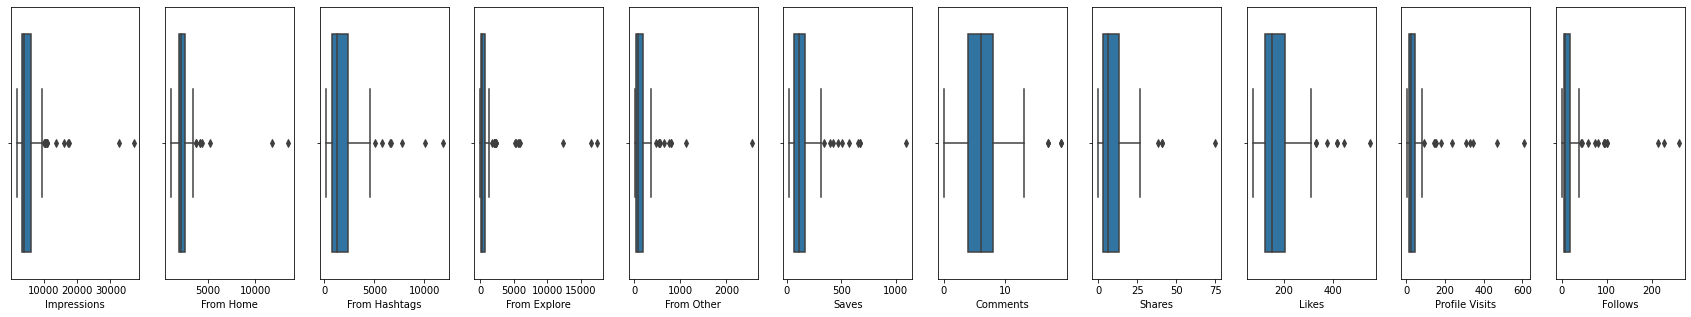

In [121]:
# Outliers

plt.figure(figsize=(30,5))
num_subplot = 1

for i in data.describe().columns:
    plt.subplot(1,11,num_subplot)
    sns.boxplot(data=data, x=i),
    num_subplot+=1  

In [122]:
# Membuat fungsi untuk melihat iqr 

def iqr(isi):
    q1 = data[isi].quantile(0.25)
    q3 = data[isi].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'Nilai IQR {isi}: {iqr}')

    upper = q3 + limit
    lower = q1 - limit
    print(f'Nilai Batas Atas: {upper}')
    print(f'Nilai Batas Bawah: {lower}')

In [123]:
iqr('Impressions')

Nilai IQR Impressions: 2671.0
Nilai Batas Atas: 10144.5
Nilai Batas Bawah: -539.5


In [124]:
data[data['Impressions'] > 10144.5]

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
40,16062,3144,11817,564,468,252,6,20,416,330,94,280 Machine Learning Projects Solved & Explain...,#data #datascience #dataanalysis #dataanalytic...
49,10386,4137,3551,2355,205,668,8,41,328,42,38,Here are some of the best websites that you ca...,#data #datascience #dataanalysis #dataanalytic...
54,10667,3152,6564,617,187,219,13,15,297,306,74,170 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...
67,10933,3152,6610,623,334,225,13,15,301,347,94,170 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...
76,10493,2106,7761,248,238,99,9,1,244,155,32,Here is a list of 100+ Machine Learning Algori...,#data #datascience #dataanalysis #dataanalytic...
90,10386,4137,3551,2355,205,668,8,41,328,42,38,Here are some of the best websites that you ca...,#data #datascience #dataanalysis #dataanalytic...
105,11068,2099,2986,5634,122,214,7,8,250,39,34,Here are some of the best data science project...,#data #datascience #dataanalysis #dataanalytic...
107,17396,1817,10008,5192,251,285,7,7,416,467,260,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...
109,17713,2449,2141,12389,561,504,3,23,308,70,96,Here are some of the best resources to learn S...,#sql #mysql #datascience #datasciencejobs #dat...
112,11149,4439,747,5762,53,273,4,13,210,61,58,Python is one of the best programming language...,#python #pythonprogramming #pythoncode #python...


Data outliers di atas tidak dapat dikeluarkan karena masih merupakan fenomena subjek penelitian, jadi sebaiknya tetap dipergunakan.

In [125]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [126]:
# membuat

df = data.copy()
df = df[['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows']]
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,2586,1028,619,56,98,9,5,162,35,2
1,5394,2727,1838,1174,78,194,7,14,224,48,10
2,4021,2085,1188,0,533,41,11,1,131,62,12
3,4528,2700,621,932,73,172,10,7,213,23,8
4,2518,1704,255,279,37,96,5,4,123,8,0


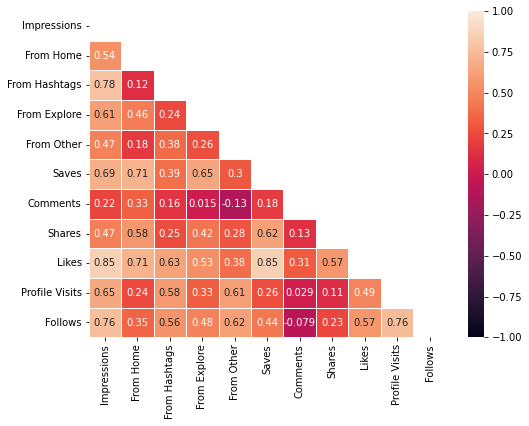

In [127]:
correlation_matrix = df[['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows']].corr(method='spearman')
correlation_matrix

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask, k=0)] = True

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, mask=mask,annot=True, linewidth=1, vmax=1, vmin= -1)
sns.color_palette("RdBu", as_cmap=True)
plt.show()

Dapat dilihat dari heatmap di atas, bahwa korelasi yang kuat dengan `Impressions` adalah `From Hashtags & Likes`.

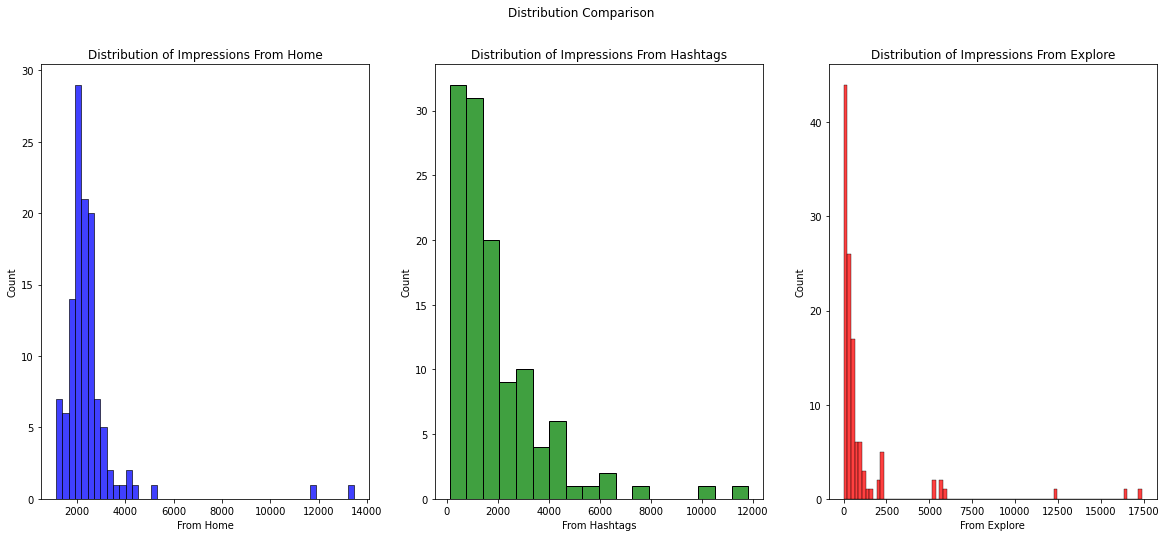

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Create a distplot for each dataset and plot on each subplot
sns.histplot(data['From Home'], ax=ax[0], color='blue')
sns.histplot(data['From Hashtags'], ax=ax[1], color='green')
sns.histplot(data['From Explore'], ax=ax[2], color='red')

# Add titles to each subplot
ax[0].set_title('Distribution of Impressions From Home')
ax[1].set_title('Distribution of Impressions From Hashtags')
ax[2].set_title('Distribution of Impressions From Explore')

fig.suptitle('Distribution Comparison')

plt.show()

## Instagram Reach Prediction Model

In [129]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows'],
      dtype='object')

In [130]:
import statsmodels.api
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [131]:
# Define X & y
X = df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
y = df['Impressions']

# Data Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2023)

In [132]:
# transformer = ColumnTransformer([
#     ('scaler', RobustScaler(), ['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows'])
# ], remainder='passthrough')

# transformer

In [133]:
# Define Model
lr = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=1)
xgbmodel = xgb.XGBRegressor()
adaboost = AdaBoostRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR()

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgbmodel, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(adaboost, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_svm = TransformedTargetRegressor(svm, func=np.log, inverse_func=np.exp)

scaler = RobustScaler()

models = [log_lr, log_knn, log_tree, log_xgb, log_ada, log_rf, log_svm]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[ -1316.42322562 -10509.00337218  -1287.74915679  -1087.05839439
  -1552.97745844] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -914.2241824  -3573.56461357  -842.42092457  -874.96586105
  -953.15851661] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.14816853 -0.24327471 -0.19049496 -0.18346203 -0.1602337 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2070.46439723 -5453.38581441 -1398.08328504 -1526.79910868
 -4817.66091384] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1316.23955011 -2074.64976615  -981.03735346 -1116.12378103
 -1881.86075923] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
               

In [134]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Bagging Regressor', 'AdaBoost Regressor','DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-3150.642321,3682.149362,-1431.666820,1071.594132,-0.185127,0.032858
1,KNN Regressor,-3053.278704,1726.805983,-1473.982242,429.675798,-0.197272,0.011037
2,Bagging Regressor,-2168.196917,1428.719932,-1016.578947,401.803928,-0.152116,0.046390
3,AdaBoost Regressor,-1896.933227,1631.593961,-945.396258,440.382998,-0.138352,0.020895
4,DecisionTree Regressor,-1997.154511,1569.722696,-999.770931,323.335522,-0.143026,0.018144
5,RandomForest Regressor,-2240.248368,1552.856691,-1017.894622,363.094280,-0.134777,0.018944
6,XGBoost Regressor,-3262.458179,2288.152791,-1371.136302,583.584336,-0.165524,0.022483


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE. 

- Berdasarkan nilai RMSE, `RandomForest Regressor` adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, `AdaBoost Regressor` memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu AdaBoost dan RandomForest.

### Predict to Test Set with the Benchmark Model

Prediksi pada test set dengan menggunakan model AdaBoost dan Random Forest

In [135]:
# Benchmark 2 model terbaik
models = {
    'AdaBoost': AdaBoostRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
AdaBoost,1827.286298,1015.667413,0.147415
RandomForest,1701.512404,861.298750,0.124512


Ketika dilakukan prediksi pada test set, performa RandomForest secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari AdaBoost.

In [136]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)*100

73.91415176275493

Kita mendapatkan score 73.91% ketika predict data train ke data test sebelum hyperparameter tuning.

### Hyperparameter Tuning

Karena model RandomForest memiliki performa yang sedikit lebih baik dari AdaBoost, maka selanjutnya kita akan menggunakan model RandomForest ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model RandomForest dengan harapan dapat meningkatkan performa model.

In [137]:
# Hyperparam 
hyperparam_space_rf = {
    'modeling__n_estimators': [10, 50, 100, 200, 500],
    'modeling__criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'modeling__max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'modeling__max_depth': [None, 5, 10, 20, 50], 
    'modeling__min_samples_split': [2, 5, 10, 20, 50],
    'modeling__min_samples_leaf': [1, 2, 4, 8, 16]
}

# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)
scaler = StandardScaler()

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('scaler', scaler),
        ('modeling', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [138]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('modeling',
                                              RandomForestRegressor(random_state=1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__criterion': ['absolute_error',
                                                                'squared_error',
                                                                'friedman_mse',
                                                                'poisson'],
                                        'modeling__max_depth': [None, 5, 10, 20,
                                                                50],
                                        'modeling__max_features': ['sqrt',
                                                                   'log2', None,
                                                                   0.5, 0.8],
                                        'modeling__min_samples_leaf': [1, 2, 4,
                                                                       8, 16],
                                        'modeling__min_samples_split': [2, 5,
                                                                        10, 20,
                                                                        50],
                                        'modeling__n_estimators': [10, 50, 100,
                                                                   200, 500]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [139]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_features,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
36,0.182000,0.020755,0.0118,0.003920,100,2,1,0.5,50,absolute_error,...,303.784680,2,-0.133349,-0.118536,-0.142264,-0.157668,-0.152925,-0.140948,0.014034,2
10,0.069999,0.003286,0.0064,0.001356,50,2,1,None,10,friedman_mse,...,246.462614,1,-0.131935,-0.108034,-0.136794,-0.171804,-0.151995,-0.140112,0.021225,1
27,0.297001,0.022154,0.0174,0.004364,200,2,1,log2,5,absolute_error,...,277.810234,3,-0.140238,-0.122948,-0.175216,-0.184102,-0.153956,-0.155292,0.022367,6
20,0.687599,0.053023,0.0348,0.001167,500,10,1,0.5,10,squared_error,...,340.078649,4,-0.129770,-0.111482,-0.163424,-0.173147,-0.173566,-0.150278,0.025155,3
45,0.155000,0.032821,0.0094,0.001356,100,10,2,0.8,50,friedman_mse,...,331.917385,5,-0.129185,-0.102245,-0.154593,-0.186045,-0.182582,-0.150930,0.031911,4


In [140]:
# Cek skor dan params terbaik
print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -2074.8505575831964
Best_params: {'modeling__n_estimators': 100, 'modeling__min_samples_split': 2, 'modeling__min_samples_leaf': 1, 'modeling__max_features': 0.5, 'modeling__max_depth': 50, 'modeling__criterion': 'absolute_error'}


Setelah hyperparameter tuning, skor MAE (Mean Absolute Error) dari model dapat naik. Ada beberapa alasan mengapa hal ini bisa terjadi, salah satunya karena adanya ketidakkonsistenan dalam data. Jika terdapat banyak nilai outlier dalam dataset, maka skor MAE dapat bervariasi dari waktu ke waktu. Hal ini dapat menyebabkan fluktuasi dalam skor setelah tuning hyperparameter. Maka hal berikutnya yang akan kita lakukan adalah dengan menghilangkan outlier pada dataset. Lalu kembali melakukan hyperparameter tuning untuk melihat score terbarunya.

-----

Menghapus semua outlier

In [141]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows'],
      dtype='object')

In [142]:
# print(f"{iqr('Impressions')}")
# print("----------------------------")
# print(f"{iqr('From Home')}")
# print("----------------------------")
# print(f"{iqr('From Hashtags')}")
# print("----------------------------")
# print(f"{iqr('From Explore')}")
# print("----------------------------")
# print(f"{iqr('From Other')}")
# print("----------------------------")
print(f"{iqr('Saves')}")
print("----------------------------")
print(f"{iqr('Comments')}")
print("----------------------------")
print(f"{iqr('Shares')}")
print("----------------------------")
print(f"{iqr('Likes')}")
print("----------------------------")
print(f"{iqr('Profile Visits')}")
print("----------------------------")
print(f"{iqr('Follows')}")

Nilai IQR Saves: 104.0
Nilai Batas Atas: 325.0
Nilai Batas Bawah: -91.0
None
----------------------------
Nilai IQR Comments: 4.0
Nilai Batas Atas: 14.0
Nilai Batas Bawah: -2.0
None
----------------------------
Nilai IQR Shares: 10.5
Nilai Batas Atas: 29.25
Nilai Batas Bawah: -12.75
None
----------------------------
Nilai IQR Likes: 82.5
Nilai Batas Atas: 327.75
Nilai Batas Bawah: -2.25
None
----------------------------
Nilai IQR Profile Visits: 27.0
Nilai Batas Atas: 82.5
Nilai Batas Bawah: -25.5
None
----------------------------
Nilai IQR Follows: 14.0
Nilai Batas Atas: 39.0
Nilai Batas Bawah: -17.0
None


In [143]:
# Drop Outlier 

outlier = df[(df['Impressions'] > 10144.5) | (df['From Home'] > 3588.75) | (df['From Hashtags'] > 4819.75) | (df['From Explore'] > 1487.5) | (df['From Other'] > 433.0) | (df['Saves'] > 325.0) | (df['Comments'] > 14.0) | (df['Shares'] > 29.25) | (df['Likes'] > 327.75) | (df['Profile Visits'] > 82.5) | (df['Follows'] > 39.0)]
df = df.drop(index= outlier.index)

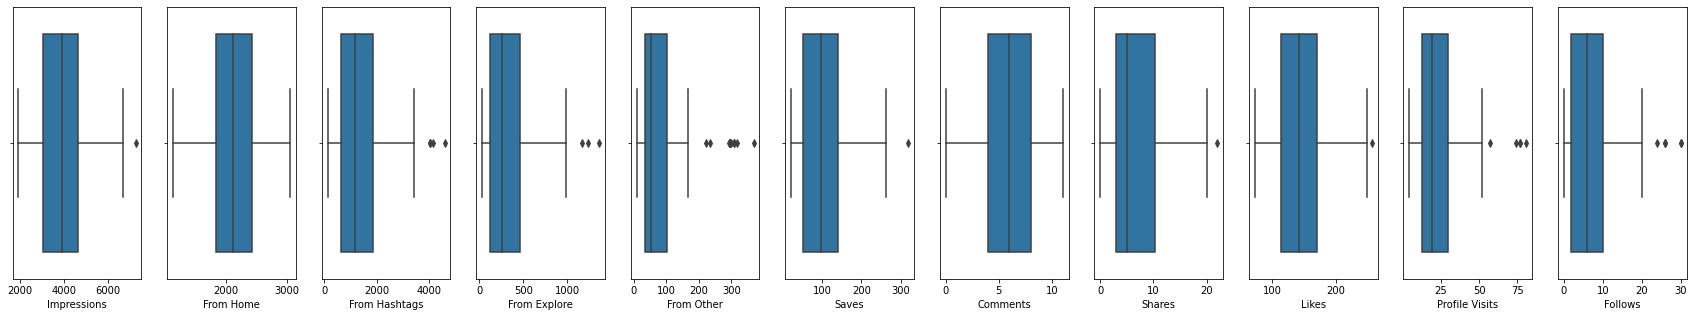

In [144]:
# Outliers

plt.figure(figsize=(30,5))
num_subplot = 1

for i in data.describe().columns:
    plt.subplot(1,11,num_subplot)
    sns.boxplot(data=df, x=i),
    num_subplot+=1  

In [145]:
# Define X & y
X = df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
y = df['Impressions']

# Data Splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2023)

In [146]:
# Define Model
lr = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=1)
xgbmodel = xgb.XGBRegressor()
adaboost = AdaBoostRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR()

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgbmodel, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(adaboost, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_svm = TransformedTargetRegressor(svm, func=np.log, inverse_func=np.exp)

scaler = StandardScaler()

models = [log_lr, log_knn, log_tree, log_xgb, log_ada, log_rf, log_svm]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-376.77392933 -683.58390801 -606.80200189 -655.03200226 -617.88572223] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-310.69070639 -530.83492279 -514.55822652 -560.10053057 -508.02280439] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.09877887 -0.13161773 -0.12267255 -0.14605393 -0.1224756 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-664.88332753 -669.77598898 -747.05264122 -623.66957096 -966.5856443 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-537.94604168 -485.23949381 -561.93290567 -531.54994525 -813.27302837] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighb

In [147]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Bagging Regressor', 'AdaBoost Regressor','DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-588.015513,109.080426,-484.841438,88.913747,-0.124320,0.015389
1,KNN Regressor,-734.393435,122.752044,-585.988283,116.326201,-0.153025,0.032811
2,Bagging Regressor,-765.757493,143.231361,-514.137363,98.097813,-0.130095,0.015234
3,AdaBoost Regressor,-621.414183,97.062273,-460.094875,89.897061,-0.120590,0.022141
4,DecisionTree Regressor,-586.608278,38.902546,-454.568407,67.620422,-0.120198,0.024907
5,RandomForest Regressor,-589.212337,15.291938,-443.110158,37.150492,-0.114229,0.013969
6,XGBoost Regressor,-608.735881,14.032069,-497.697747,42.399254,-0.127577,0.014050


In [148]:
# Benchmark 2 model terbaik
models = {
    'AdaBoost': AdaBoostRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
AdaBoost,765.541121,623.831633,0.148807
RandomForest,807.123293,618.622941,0.139013


In [149]:
# Hyperparam 
hyperparam_space_rf = {
    'modeling__n_estimators': [10, 50, 100, 200, 500],
    'modeling__criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'modeling__max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'modeling__max_depth': [None, 5, 10, 20, 50], 
    'modeling__min_samples_split': [2, 5, 10, 20, 50],
    'modeling__min_samples_leaf': [1, 2, 4, 8, 16]
}

# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)
scaler = StandardScaler()

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('scaler', scaler),
        ('modeling', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [150]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('modeling',
                                              RandomForestRegressor(random_state=1))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__criterion': ['absolute_error',
                                                                'squared_error',
                                                                'friedman_mse',
                                                                'poisson'],
                                        'modeling__max_depth': [None, 5, 10, 20,
                                                                50],
                                        'modeling__max_features': ['sqrt',
                                                                   'log2', None,
                                                                   0.5, 0.8],
                                        'modeling__min_samples_leaf': [1, 2, 4,
                                                                       8, 16],
                                        'modeling__min_samples_split': [2, 5,
                                                                        10, 20,
                                                                        50],
                                        'modeling__n_estimators': [10, 50, 100,
                                                                   200, 500]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [151]:
# Cek skor dan params terbaik
print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -589.677110483614
Best_params: {'modeling__n_estimators': 100, 'modeling__min_samples_split': 2, 'modeling__min_samples_leaf': 1, 'modeling__max_features': 0.5, 'modeling__max_depth': 50, 'modeling__criterion': 'absolute_error'}


Comparison

In [152]:
# algo
model = rf

# pipeline
pipe_model = Pipeline([
    ('modeling', model)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_model.predict(X_test)

# MAE pada model sebelum tuning
mean_absolute_error(y_test, y_pred_before)

617.3605882352941

In [153]:
random_rf.best_params_

{'modeling__n_estimators': 100,
 'modeling__min_samples_split': 2,
 'modeling__min_samples_leaf': 1,
 'modeling__max_features': 0.5,
 'modeling__max_depth': 50,
 'modeling__criterion': 'absolute_error'}

In [175]:
# Model XGBoost
model = {'rf': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_rf.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
rf,766.937179,562.99,0.124218


In [154]:
model_tuning = RandomForestRegressor(random_state=1, n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_features= 0.5, max_depth= 50, criterion= 'absolute_error')

# pipeline
pipe_model_tuning = Pipeline([
    ('modeling', model_tuning)
])

pipe_model_tuning

Pipeline(steps=[('modeling',
                 RandomForestRegressor(criterion='absolute_error', max_depth=50,
                                       max_features=0.5, random_state=1))])

In [155]:
# define best model (after tuning)
best_model = random_rf.best_estimator_

# fit
best_model.fit(X_train, y_train)

# predict
y_pred_after = best_model.predict(X_test)

# MAE untuk model setelah tuning
mean_absolute_error(y_test, y_pred_after)

562.9899999999999

In [156]:
# compare
print(mean_absolute_error(y_test, y_pred_before), 'MAE sebelum tuning')
print(mean_absolute_error(y_test, y_pred_after), 'MAE setelah tuning')

617.3605882352941 MAE sebelum tuning
562.9899999999999 MAE setelah tuning


### Residual Plot

In [157]:
# residual = y_actual - y_prediksi
residual = y_test - y_pred_after

df_residual = pd.DataFrame({
    'y_pred': y_pred_after,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
50,3475.63,-477.63
0,4179.97,-259.97
21,3713.74,259.26
19,2408.87,-1.87
100,4729.53,593.47


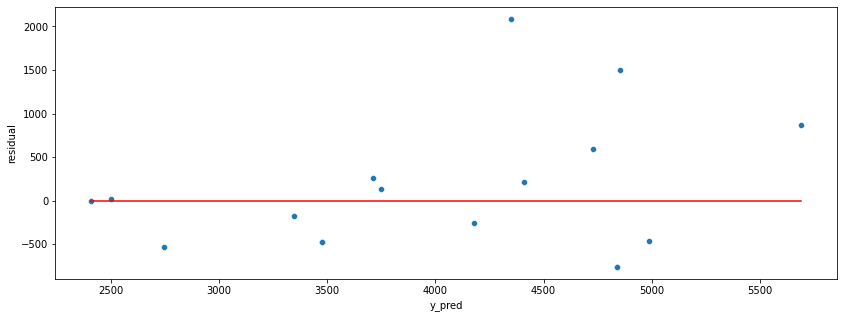

In [158]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red');

In [162]:
df_residual

,y_pred,residual
50,3475.63,-477.63
0,4179.97,-259.97
21,3713.74,259.26
19,2408.87,-1.87
35,2501.84,21.16
3,4988.51,-460.51
24,4410.23,217.77
91,3475.63,-477.63
5,3749.36,134.64
84,3346.99,-177.99


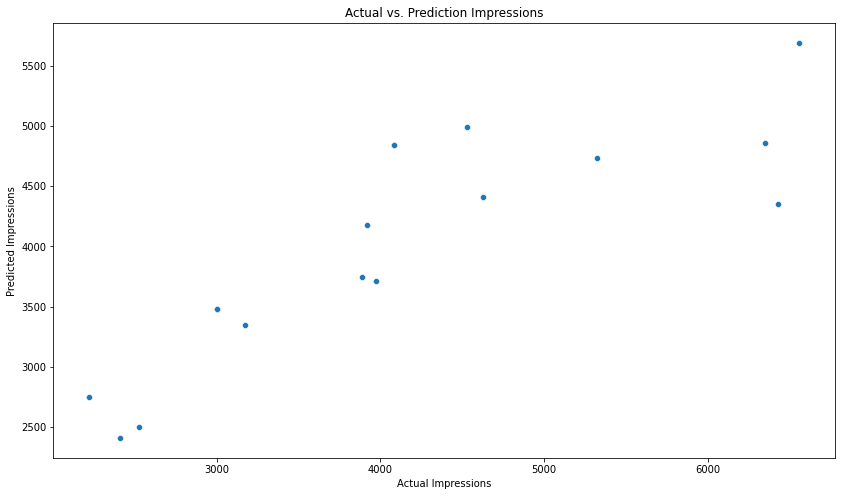

In [176]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Impressions', 
                                               xlabel='Actual Impressions', 
                                               ylabel='Predicted Impressions');

### Feature Importance

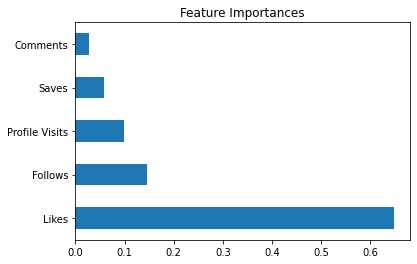

In [174]:
# Plot feature importances

feature_imp = pd.Series(estimator_rf['modeling'].feature_importances_, scaler.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## Conclusion

- Berdasarkan pemodelan yang sudah dilakukan, fitur `Likes` dan `Follows` menjadi fitur yang paling berpengaruh terhadap `Impressions`.

- Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~12%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan impressions baru di Instagram pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan impressions rata-rata akan meleset kurang lebih sebesar 12% dari impressions seharusnya.

- Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara impressions aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset.

-----

### Save Model

In [179]:
# # Save model
# import pickle

# estimator = Pipeline([('preprocess', scaler), ('model', RandomForestRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_CLV_RF.sav', 'wb'))

In [ ]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))